# CQED_IELS 02 - Quantum IELS with a Fock state

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

from qutip import basis, tensor, qeye, hinton, destroy, qdiags, entropy_vn

import sys
sys.path.append('pyQIELS')
from src.pinem_spectrum import pinemQ_Fock
from cQED_IELS import pinem_dm2spec

font = {'family': 'Sans','color':  'black','weight': 'normal','size': 12}
violet=(105./255,65./255,235./255)
bleu=(0./255,55./255,104./255)
orange_s=(255./255,69./255,0./255)

In [3]:
# Fock state basis dimension
M=5
# Number of sidebands
n_sidebands=3
# Number of electron states
N=2*n_sidebands+1

#### Define electron and photon operators

In [4]:
kick=qdiags([1]*(N-1), 1) 
a = tensor(destroy(M), qeye(N))
b = tensor(qeye(M), kick)

#### Define scattering matrix

In [5]:
g0=0.4
S=(g0*(b*a.dag())-np.conj(g0)*b.dag()*a).expm()

#### Initial electron-photon state

In [6]:
### We start with a Coherent state
# Average number of photon
nbar=2
# Photon initial wavefunction 
photon_state_ini=basis(M,nbar)
# Electron-Photon initial wavefunction 
psi_list=[photon_state_ini,basis(N,n_sidebands)]
psi0 = tensor(psi_list)

#### Calculate the final state from the $S$-matrix

In [7]:
psi_f=S*psi0

#### Compute the density matrices

In [8]:
# Calculate the final electron density matrix
rho_f_PINEM=psi_f*psi_f.dag()
# Compute the reduced density matrices
rho_elec=rho_f_PINEM.ptrace(1)
rho_phot=rho_f_PINEM.ptrace(0)

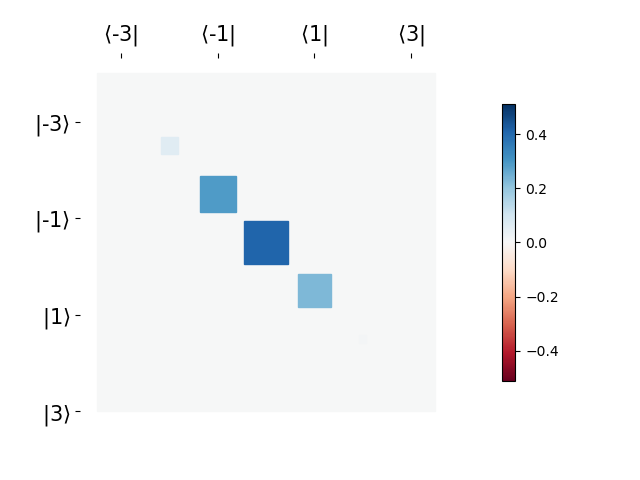

In [9]:
# Plot the electron density matrix
ylabel=[]
xlabel=[]
xtick=[]
ytick=[]

for i in range(N):
    if ((i)%2==0) & (np.abs(i-n_sidebands)<10):
        ylabel.append(r'$\vert$'+str(i-n_sidebands)+r'$\rangle$')
        xlabel.append(r'$\langle$'+str(i-n_sidebands)+r'$\vert$')
        xtick.append(i+0.5)
        ytick.append(i)
ylabel.reverse()

fig,ax=hinton(rho_elec)
ax.set_yticks(ytick,ylabel,fontsize=15)
ax.set_xticks(xtick,xlabel,fontsize=15)
plt.show()
filename='electron_DM_Fock_nbar='+str(nbar)+'.png'
plt.savefig(filename,dpi=400,transparent=False)

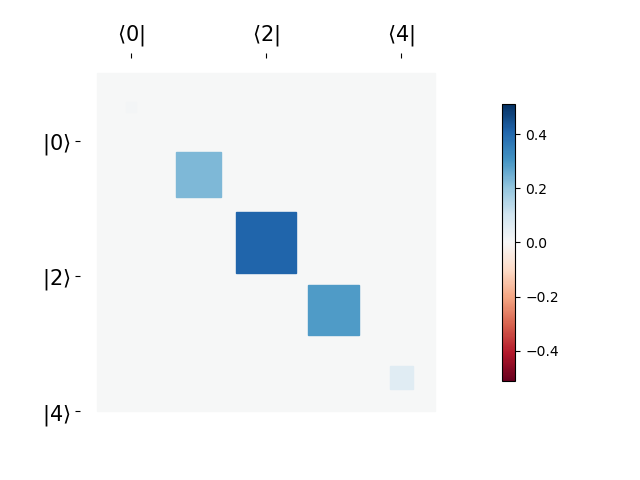

In [10]:
ylabel=[]
xlabel=[]
xtick=[]
ytick=[]

for i in range(M):
    if i%2==0:
        ylabel.append(r'$\vert$'+str(i)+r'$\rangle$')
        xlabel.append(r'$\langle$'+str(i)+r'$\vert$')
        xtick.append(i+0.5)
        ytick.append(i)
ylabel.reverse()

# Plot the final density matrix
fig,ax = hinton(rho_phot,color_style='scaled')
ax.set_yticks(ytick,ylabel,fontsize=15)
ax.set_xticks(xtick,xlabel,fontsize=15)
plt.show()
filename='photon_DM_Fock_nbar='+str(nbar)+'.png'
plt.savefig(filename,dpi=400,transparent=False)

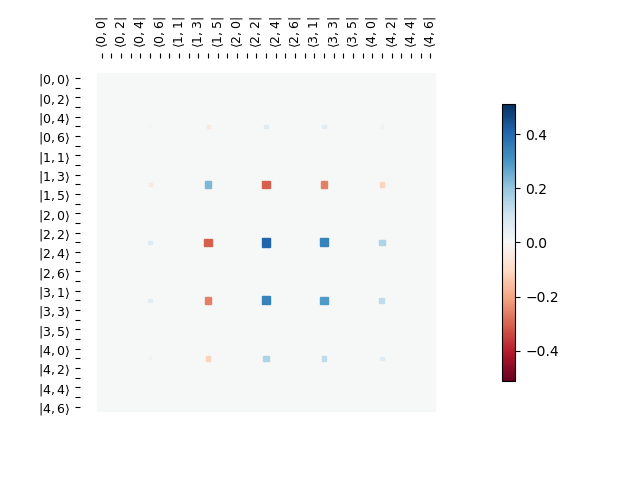

In [11]:
fig,ax=hinton(rho_f_PINEM)
#ax.tick_params(axis='x', labelsize=5)
xlabels=ax.get_xticklabels()
ylabels=ax.get_yticklabels()
for i in range(len(xlabels)):
    if (i-1)%2==0:
        xlabels[i]=''
        ylabels[i]=''
ax.set_xticklabels(xlabels,fontsize=9,rotation=90)
ax.set_yticklabels(ylabels,fontsize=9)
plt.show()
filename='electron-photon_DM_Fock_nbar='+str(nbar)+'.png'
plt.savefig(filename,dpi=400,transparent=False)

In [12]:
print('S_tot = '+str(round(entropy_vn(rho_f_PINEM),15)))
print('S_elec = '+str(round(entropy_vn(rho_elec),3)))
print('S_phot = '+str(round(entropy_vn(rho_phot),3)))

S_tot = 4e-15
S_elec = 1.281
S_phot = 1.281


#### Compute PINEM spectrum

In [13]:
# Experimental parameters
ZLP_width=0.2
photon_energy=1.55
ene=np.linspace(-10,10,1000)

In [14]:
# Compute the PINEM spectrum from the cQED computation
spectre_from_dm=pinem_dm2spec(ene,rho_elec,ZLP_width,photon_energy)
spectre_analytical=pinemQ_Fock(ene,photon_energy,np.abs(g0),ZLP_width,nbar,'analytical')

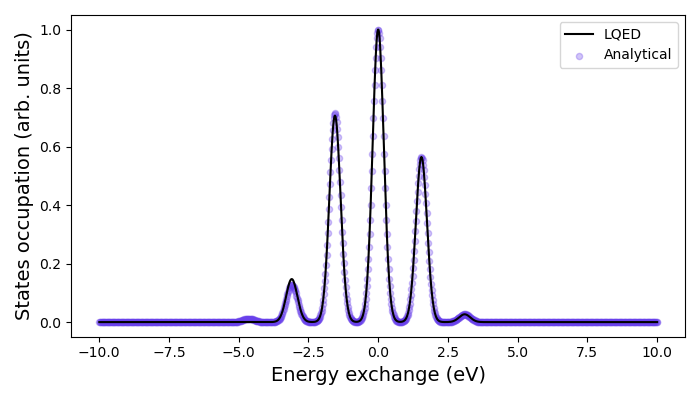

In [16]:
# Plot the two different PINEM spectra
plt.figure(figsize=(7,4))
plt.plot(ene,spectre_from_dm/np.max(spectre_from_dm),c='k',label='LQED')
plt.scatter(ene,spectre_analytical/np.max(spectre_analytical),alpha=0.3,s=20,color=violet,label='Analytical')
plt.legend()
plt.xlabel('Energy exchange (eV)',fontsize=14)
plt.ylabel('States occupation (arb. units)',fontsize=14)
plt.tight_layout()
plt.show()

filename='Cavity_FockState_spectrum.png'
plt.savefig(filename,dpi=500,transparent=False)